In [1]:
%%html
<style>
table {align:left;display:block}  # to align html tables to left
</style>

# Dataquest - Data visualisation Fundamentals <br/> <br/> Project Title: Finding Heavy Traffic Indicators on I-94

## 1) Introduction: The I-94 Traffic Dataset

#### Metadata
John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

Dataset original source: [Link](https://archive.ics.uci.edu/ml/machine-learning-databases/00492/)

Dataset documentation: [Link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

| Column | Datatype context | Description |
| --- | --- | --- |
| holiday | Categorical | US National holidays plus regional holiday, Minnesota State Fair |
| temp | Numeric | Average temp in kelvin | 
| rain_1h | Numeric | Amount in mm of rain that occurred in the hour |
| snow_1h | Numeric | Amount in mm of snow that occurred in the hour |
| clouds_all | Numeric | Percentage of cloud cover |
| weather_main | Categorical | Short textual description of the current weather |
| weather_description| Categorical | Longer textual description of the current weather |
| date_time | DateTime | Hour of the data collected in local CST time |
| traffic_volume | Numeric | Hourly I-94 ATR 301 reported westbound traffic volume |


## Ask: Background and questions
- We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

- The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

- We'll also apply some of the following exploratory data visualisation tools for familiarity and showcase
  - How to visualize time series data with line plots.
  - How to visualize correlations with scatter plots.
  - How to visualize frequency distributions with bar plots and histograms.
  - How to speed up our exploratory data visualization workflow with the pandas library.
  - How to compare graphs using grid charts.

## Prepare: Load, open and explore datasets

In [2]:
import pandas as pd  # import pandas lib

# read csv file into pandas dataframe
df = pd.read_csv('Metro_Interstate_Traffic_volume.csv')

# review first few rows
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# review last few rows
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
# review dataset other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### Findings (The I-94 Traffic Dataset):
- 48,204 rows, 9 columns
- no null value in any volumn
- 3 existing data types

## 2) Analysing Traffic Volume
- The dataset [documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).

- This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.

### Histogram & Statistical distribution
- In the next exercise, we're going to plot a histogram to visualize the distribution of the traffic_volume column.

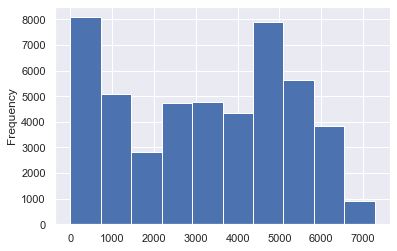

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [5]:
# import matplotlib.pyplot for general plotting purposes
# '%matplotlib inline' enables Jupyter to generate the graphs
import matplotlib.pyplot as plt
%matplotlib inline  

# import seaborn and inherit its theme to enhance plot aesthetics
import seaborn as sns
sns.set_theme()

# Plot a histogram to examine the distribution of the traffic_volume column. 
# Use a Pandas method.
df['traffic_volume'].plot.hist()
plt.show()

# Use Series.describe() to look up a few statistics about the traffic_volume column.
df['traffic_volume'].describe()

#### Findings (Analysing Traffic Volume):
- There are 2 high frequencies (Hourly I-94 ATR 301 reported) approximately ranging:
  - 0 - 1,000
  - 4,500 - 5,000
  - these 2 distinct high frequencies may possibly be interpreted as off-peak and peak traffic hours in each single day
    - Possible hypothesis: Daytime and nighttime hours affect traffic?


- Mean traffic volume = 3,260
- 25% of samples fall bellow 1,193
- 50% of samples fall bellow 3,380
- 75% of samples fall bellow 4,933
- 100% of samples fall bellow 7,280

## 3) Traffic Volume: Day vs. Night
- Possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.


- We'll start by dividing the dataset into two parts for analysis:
  - Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
  - Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [6]:
# Transform the date_time column to datetime by using the function pd.to_datetime()
df['date_time'] = pd.to_datetime(df['date_time'])

# check that datatype is converted to datetime

df['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [7]:
# Use the pd.Series.dt.hour property to get the hour of
# every instance of the date_time column
# and isolate daytime / nighttime data

# we can review from above and below that datetime converted is displayed in 24 hrs format
series_hours = df['date_time'].dt.hour
series_hours

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [8]:
# isolate data rows between 7am (exclusive) to 7pm (inclusive) (12 hours)
# inclusive parameter is not working for series.between,
# hence treat both bounds are inclusive and adjust code accordingly
# eg. to get 7am exclusive, start range from 8am inclusive
series_day_bool = series_hours.between(8, 19)
df_day = df[series_day_bool]

# check transformation
df_day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [9]:
# isolate data rows between 7pm (exclusive) to 7am (inclusive) (12 hours)
# highest hour value is 23
# inclusive parameter is not working for series.between,
# hence treat both bounds are inclusive and adjust code accordingly
# eg. to get 7pm exclusive, start range from 8pm inclusive
series_night_bool = series_hours.between(20, 23) | series_hours.between(0, 7)
df_night = df[series_night_bool]

# check transformation
df_night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
...,...,...,...,...,...,...,...,...,...
48185,None,280.16,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 07:00:00,1175
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [10]:
# check total number of rows matched up to 48,204 rows per above
print(df_night.count() + df_day.count())

holiday                48204
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
traffic_volume         48204
dtype: int64


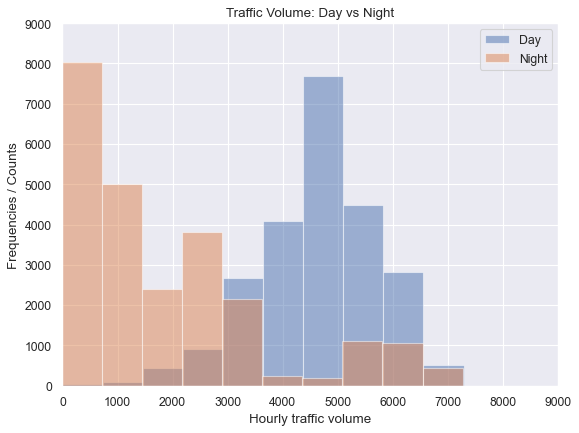

In [34]:
# Plot the histograms of traffic_volume for both day and night. 
# Organize the two histograms side-by-side on a grid chart.

# make the plot size bigger using plt.figure 
# figsize:(float, float) - Width, height in inches.
# dpi:float - The resolution of the figure in dots-per-inch.
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)



# Plot the histogram
# adjust alpha transparency so that overlapping histograms can be seen
# markers label for legend purposes
plt.hist(x=df_day['traffic_volume'], label='Day', alpha=0.5)
plt.hist(x=df_night['traffic_volume'], label='Night', alpha=0.5)
plt.title('Traffic Volume: Day vs Night')
plt.xlabel('Hourly traffic volume')
plt.ylabel('Frequencies / Counts')
plt.xlim([0,9000])  # set x and y limits to be same scale for shape comparision
plt.ylim([0,9000])
plt.legend()  # show legend
plt.show;  # add ';' to remove unwanted output message

In [25]:
# Describe statistical summary of day/night traffic volume
df_day['traffic_volume'].describe()

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [35]:
print(df_night['traffic_volume'].describe())

count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64


#### Findings (Traffic Volume: Day vs Night):
- Although traffic appears light at night most of the time, there are times at night where traffic is still high (eg. 7,000 hourly traffic volume).

- The lack of traffic volume can also be useful in comparing any indicators that is present in day time data, yet absent in night time data, hence those indicators may serve as good correlation factors for further hypothesis and analysis, should time and resources allows for more analytical work.


- Based on histograms:
  - Traffic volume in day hours is significantly higher than night hours
  - Day traffic is normal distribution, night traffic is right skewed
  - Day hours traffic highest count: 4,500 - 5,000 Hourly traffic volume
  - Night hours traffic highest count: 0 - 500 Hourly traffic volume


- Based on summary statistics (Hourly traffic volume):
  - Day hours (7am - 7pm):
    - Mean: 4,641
    - 25%: < 4,049
    - 50%: < 4,708
    - 75%: < 5,337
    - 100%: < 7,280
  - Night hours (7pm - 7am):
    - Mean: 1,917
    - 25%: < 532
    - 50%: < 1,242
    - 75%: < 2,772
    - 100%: < 7,260

## 4) Time Indicators - By Month
- Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward for efficiency purposes.

- One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

- We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
  - Month
  - Day of the week
  - Time of day

In [61]:
# transform day traffic dataset for analysis
# group by month, then display mean traffic volume

df_day.loc[:, 'month'] = df_day['date_time'].dt.month  # create new column 'month' from existing column date_time
day_by_month = df_day.groupby('month').mean()  # group by month, transform all categories to output mean values
day_by_month['traffic_volume']  # only display 'traffic_volume' category

month
1.0     4379.382785
2.0     4577.445087
3.0     4755.891671
4.0     4742.272508
5.0     4769.600454
6.0     4787.214477
7.0     4494.121650
8.0     4799.611891
9.0     4745.968382
10.0    4812.563146
11.0    4574.138274
12.0    4313.228426
Name: traffic_volume, dtype: float64

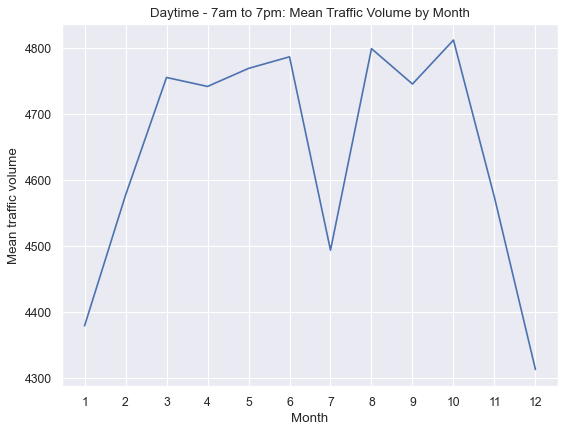

In [77]:
# Generate a line plot to visualize how
# the traffic volume changed each month on average.

import numpy as np  # for np.arange()

figure(figsize=(8, 6), dpi=80)  # adjust size of plot
plt.plot(day_by_month['traffic_volume'])
plt.title('Daytime - 7am to 7pm: Mean Traffic Volume by Month')
plt.xlabel('Month')
plt.ylabel('Mean traffic volume')
plt.xticks(np.arange(1,13,1))  # adjust xticks: numpy.arange([start, ]stop, [step, ])
plt.show()

#### Findings (Time Indicators - By Month):
- From Line graph above:
  - Dips in traffic volume on January, July, December
  - Higher traffic volume in other months
  - Possible reason: Day time commuters mostly comprises of working people, where a significant proportion take a rest during the dip months (ie. Jan, Jul, Dec)

## 5) Time Indicators - By Day of Week
- Analysis using line plots for another time unit: day of the week.

In [86]:
# create new column using existing date_time column
df_day.loc[:, 'dayofweek'] = df_day['date_time'].dt.dayofweek

# group by day, transform all categories to output mean values
day_by_weekday = df_day.groupby('dayofweek').mean()

# only display 'traffic_volume' category
# 0 is Monday, 6 is Sunday
day_by_weekday['traffic_volume']

dayofweek
0.0    4654.143222
1.0    4949.945727
2.0    5058.010219
3.0    5075.290639
4.0    5085.229148
5.0    4056.587118
6.0    3606.582789
Name: traffic_volume, dtype: float64

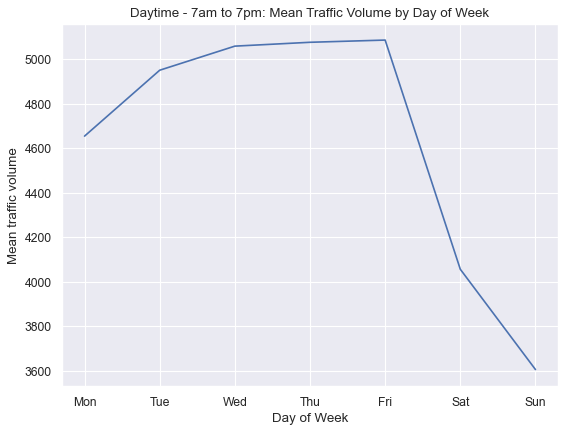

In [91]:
# Generate a line plot to visualize how
# the traffic volume changed each month on average.

# create list of 7 days to pair with xticks later
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

figure(figsize=(8, 6), dpi=80)  # adjust size of plot
plt.plot(day_by_weekday['traffic_volume'])
plt.title('Daytime - 7am to 7pm: Mean Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Mean traffic volume')
plt.xticks(np.arange(0,7,1), days)  # adjust xticks: numpy.arange([start, ]stop, [step, ])
plt.show()

#### Findings (Time Indicators - By Day of Week):
- From Line graph above:
  - Dips in traffic volume for weekends (ie. Sat, Sun)
  - Higher traffic volume in other business days (ie. Mon to Fri)
  - Analysis: This corroborates the hypothesis above that day time commuters mostly comprises of working people.

## 6) Time Indicators - By Time of Day
- Analysis using line plots for another time unit: time of the day.
- Split analysis by 2 separate groups: weekends and business days
  - Reason for split: 2 groups has significantly different mean traffic volume trends identified

In [106]:
# perform transformation
pd.options.mode.chained_assignment = None  # default='warn'; 'None' removes warning message

df_day['hour'] = df_day['date_time'].dt.hour  # new column 'hour' from existing date_time column
bussiness_days = df_day.copy()[df_day['dayofweek'] <= 4] # 4 == Friday; only copy selected rows to new df
weekend = df_day.copy()[df_day['dayofweek'] >= 5] # 5 == Saturday; only copy selected rows to new df
by_hour_business = bussiness_days.groupby('hour').mean()  # business days group by hour, transform values to mean
by_hour_weekend = weekend.groupby('hour').mean()   # weekends group by hour, transform values to mean

# check transformation
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
8.0     5503.497970
9.0     4895.269257
10.0    4378.419118
11.0    4633.419470
12.0    4855.382143
13.0    4859.180473
14.0    5152.995778
15.0    5592.897768
16.0    6189.473647
17.0    5784.827133
18.0    4434.209431
19.0    3298.340426
Name: traffic_volume, dtype: float64
hour
8.0     2338.578073
9.0     3111.623917
10.0    3686.632302
11.0    4044.154955
12.0    4372.482883
13.0    4362.296564
14.0    4358.543796
15.0    4342.456881
16.0    4339.693805
17.0    4151.919929
18.0    3811.792279
19.0    3220.234120
Name: traffic_volume, dtype: float64


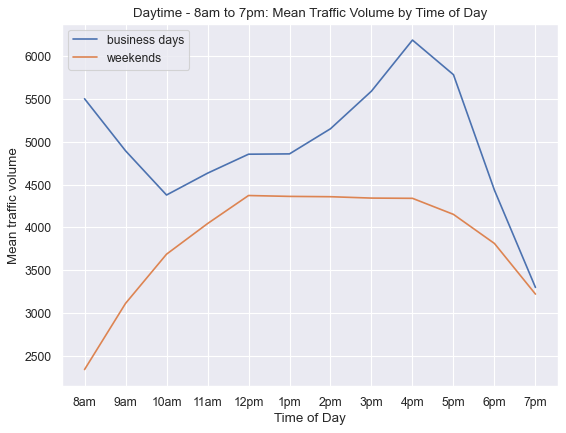

In [114]:
# Generate line plots to visualize how
# the traffic volume changed each hour on average
# differentiated by two separate 2 groups

# create list of hours to pair with xticks later
time = ['8am', '9am', '10am', '11am', '12pm', '1pm', '2pm',
       '3pm', '4pm', '5pm', '6pm', '7pm']


figure(figsize=(8, 6), dpi=80)  # adjust size of plot
plt.plot(by_hour_business['traffic_volume'], label='business days')  # plot for business days
plt.plot(by_hour_weekend['traffic_volume'], label='weekends')  # plot for weekends
plt.title('Daytime - 8am to 7pm: Mean Traffic Volume by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Mean traffic volume')
plt.xticks(np.arange(8,20,1), time)  # adjust xticks: numpy.arange([start, ]stop, [step, ])
plt.legend()  # show legend defined in markers (ie. plt.plot)
plt.show()

#### Findings (Time Indicators - By Time of Day):
- Business days' traffic volume is higher during earliest hour (ie. 8am) and evenings (ie. 4pm - 5pm), and lower throughout majority of hours
  - This is indicative support on hypothesis that for business days, traffic volume rises due to commuters travelling to work during early mornings or evenings
- Weekends' traffic volume is lower during early morning (ie. 8am) and evenings (ie. decline from 4pm onwards)
  - This is indicative support on hypothesis that for weekends, travelling volume is more evenly space-out throughout the days for general reasons as people has no need to commute to and from workplace
- In general, traffic volume is higher during business days as compared to weekends, indicative support on hypothesis that significant traffic volume is due to commuting to work

## 7) Weather Indicators
- Current trends identified (for daytime dataset):
  - Traffic is usually heavier during usual months compared to dip months (Jan, Jul, Dec).
  - The traffic is usually heavier on business days compared to weekends.
  - On business days, peak hours are around 8am and 4pm.
- Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather:
  - temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.
  - A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [122]:
# Find the correlation values between traffic_volume and
# the numerical weather columns.

df_day_mod = df_day.drop(labels=['month', 'dayofweek', 'hour'], axis=1)  # axis=1 to drop columns
df_day_mod.corr()['traffic_volume']  # to locate correlation with traffic volume

temp              0.133283
rain_1h           0.005001
snow_1h           0.005186
clouds_all       -0.037828
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

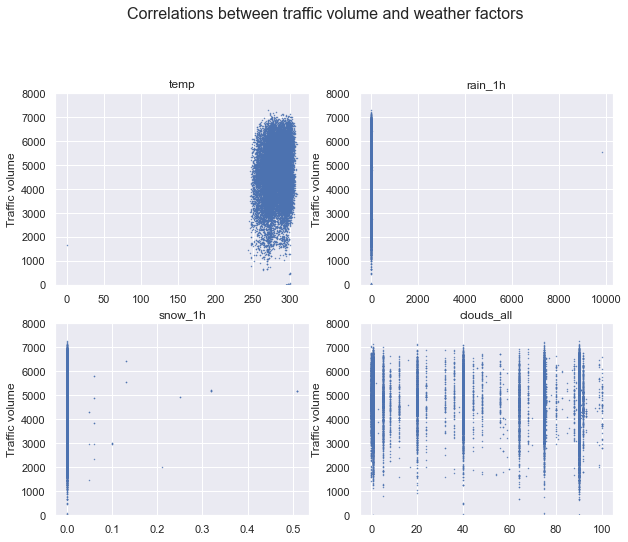

In [155]:
# plot multiple scatterplots for correlations
# on 1 graph figure (ie. grid charts)


# ready 1 figure for multiple plot charts
fig = plt.figure(figsize=(10, 12))

# overall title for figure
fig.suptitle('Correlations between traffic volume and weather factors', fontsize=16)

# zip transforms the 2 variable into tuple pairs,
# so that 2 variables can be iterated at same time.
# range(1, 5) covers 4 values: ie. 1,2,3,4; end value is exclusive
weather_var = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
for i, var in zip(range(1, 5), weather_var):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns, ith index position
    plt.scatter(df_day[var], 
             df_day['traffic_volume'], s=0.2)  # s controls marker size
    plt.ylabel('Traffic volume')
    plt.ylim([0,8000])
    plt.title(label=var)
    
plt.show()

#### Findings (Weather Indicators):
- Interpretation of pearson's correlation coefficient:
  - [Source Link](https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)
  - Strongest correlation factor for weather variables against traffic volume is temp, with the value of 0.13.
  - 0.3 value is considered as a weak linear relationship, hence 0.13 can be considered as insignificant correlation identified.
  - In other words, it may be interpreted that no weather column seem to be reliable indicators for traffic volume.

## 8) Weather Types
- Previously, we examined the correlation between traffic_volume and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

- To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [234]:
# calculate the average traffic volume associated with 
# each unique value in these two columns.

# use groupby() and categorise by mean traffic volume
series_by_weather_main = df_day.groupby('weather_main').mean()['traffic_volume']
series_by_weather_description = df_day.groupby('weather_description').mean()['traffic_volume']

# check transformation
print(series_by_weather_main)
print(type(series_by_weather_main))

weather_main
Clear           4662.582471
Clouds          4744.546704
Drizzle         4694.158076
Fog             4136.673684
Haze            4549.198565
Mist            4484.141081
Rain            4670.116271
Smoke           4636.083333
Snow            4283.592463
Squall          4211.000000
Thunderstorm    4493.042035
Name: traffic_volume, dtype: float64
<class 'pandas.core.series.Series'>


In [235]:
# check transformation
print(series_by_weather_description)
print(type(series_by_weather_description))

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4790.586166
broken clouds                          4716.012645
drizzle                                4525.467626
few clouds                             4732.974138
fog                                    4136.673684
freezing rain                          4314.000000
haze                                   4549.198565
heavy intensity drizzle                4526.240000
heavy intensity rain                   4453.663636
heavy snow                             4298.099042
light intensity drizzle                4781.718310
light intensity shower rain            4437.454545
light rain                             4716.496823
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4334.046924
mist                                   4484.141081
moderate rain                          4619.261204
overcast cl

In [247]:
# extract numpy of relevant weather_main categorial values for barcharts
list_weather_main = (series_by_weather_main.index).to_numpy()
    
# check transformation
list_weather_main

array(['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain',
       'Smoke', 'Snow', 'Squall', 'Thunderstorm'], dtype=object)

In [244]:
# extract numpy of traffic volume for barcharts
width = series_by_weather_main.to_numpy()

# check transformation
width

array([4662.58247067, 4744.54670423, 4694.1580756 , 4136.67368421,
       4549.19856459, 4484.14108062, 4670.11627095, 4636.08333333,
       4283.59246336, 4211.        , 4493.0420354 ])

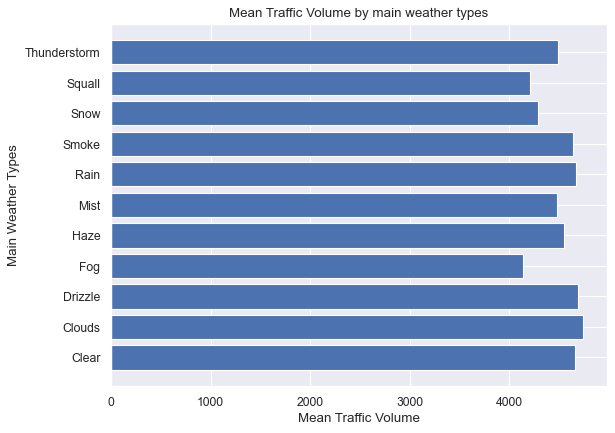

In [253]:
# bar plots for main weather types
figure(figsize=(8, 6), dpi=80)  # adjust size of plot
plt.barh(y=list_weather_main, width=width)
plt.title('Mean Traffic Volume by main weather types')
plt.xlabel('Mean Traffic Volume')
plt.ylabel('Main Weather Types')
plt.show()

#### Findings (Weather Types - Main):
- No mean traffic volume exceeding 5,000 cars
- No clear weather types that clearly influences traffic volume

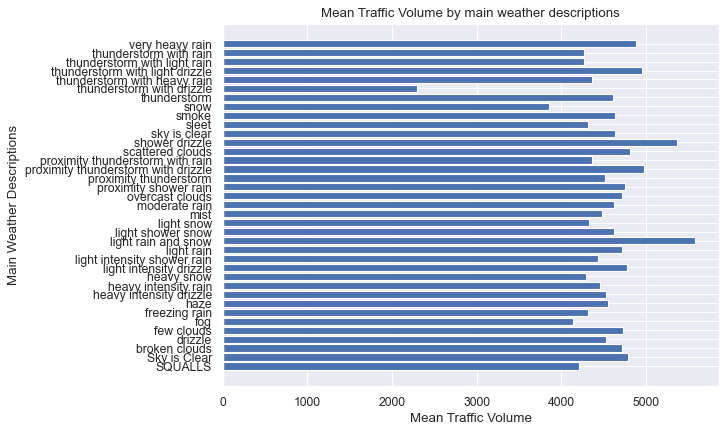

In [263]:
# extract numpy of relevant weather_description categorial values for barcharts
list_weather_description = (series_by_weather_description.index).to_numpy()
# extract numpy of traffic volume for barcharts
width = series_by_weather_description.to_numpy()

# bar plots for weather descriptions
figure(figsize=(8, 6), dpi=80)  # adjust size of plot
plt.barh(y=list_weather_description, width=width)
plt.title('Mean Traffic Volume by main weather descriptions')
plt.xlabel('Mean Traffic Volume')
plt.ylabel('Main Weather Descriptions')
plt.show()

#### Findings (Weather Types - Description):
- Mean traffic volume exceeding 5,000 cars
  - Weather descriptions: Scattered clouds, light shower snow
  - Clearly an influence on traffic volume to be higher

## 9) Conclusion

#### What we have done in this notebook
- Tried to find a few indicators of heavy traffic on the I-94 Interstate highway.
- Managed to find 2 types of indicators (for daytime dataset):
  - Time indicators
    - Traffic is usually heavier during usual months compared to dip months (Jan, Jul, Dec)
    - The traffic is usually heavier on business days compared to weekends
    - On business days, peak hours are around 8am and 4pm.
  - Weather indicators
    - Scattered clouds, light shower snow clearly an influence to increase traffic volume


#### Potential areas for further analysis and improve presentation
- Use the nighttime data to look for heavy traffic indicators.
- Find more time and weather indicators.
- Improve style and presentation of notebook
